# Project Info:

### Name: Pooja Shah
### Topic: Web Scraping of Booking.com, Lille

For this project, I have collected the below information from Booking.com for the city of Lille. 
The data is extracted on monthly basis for a total of 12 months from **December 2020 to November 2021**. 

- Hotel/Apartment Name                                                                   
- Location (in Lille)
- Total Price in Euros (for the selected period i.e. month)
- Number of nights
- Number of persons
- Room Type
- Beds
- Rating
- Rating Title
- Number of reviews
- Distance from city centre
- Booking start date
- Booking end date
- Is breakfast included in the price?
- Is free cancellation option applicable?

The analysis and visualizations in this Jupyter Notebook are divided in 3 major parts - 

1. Availability
2. Price
3. Ratings & Reviews


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv extracted by web-scraping
booking_data = pd.read_csv('Booking Hotels Monthly Data_Pooja Shah.csv')

#Copying the data to another dataframe
df = booking_data.copy()
df.tail(2)

,name,location,total_price,Nbr_of_nights,Nbr_of_persons,room_type,beds,rating,rating_title,number_of_ratings,distance_from_centre,start_date,end_date,breakfast_inclusion,free_cancellation,url
2711,NOCNOC - La Villa Cachee,Lille Centre,11386,29,2,Villa,"14 beds(7 singles, 5 doubles, 2 sofa beds)",7.8,Good,5 reviews,900 m,Monday 1 November 2021,Tuesday 30 November 2021,Not Included,No Free Cancellation,https://www.booking.com/hotel/fr/la-villa-cach...
2712,Bright and cosy duplex with terrace at the hea...,Vieux Lille,40282,29,2,Apartment,"2 beds(1 double, 1 sofa bed)",NaN,NaN,NaN,800 m,Monday 1 November 2021,Tuesday 30 November 2021,Not Included,No Free Cancellation,https://www.booking.com/hotel/fr/bright-and-co...


In [3]:
df.shape

(2713, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2713 non-null   object 
 1   location              2713 non-null   object 
 2   total_price           2713 non-null   object 
 3   Nbr_of_nights         2713 non-null   int64  
 4   Nbr_of_persons        2713 non-null   int64  
 5   room_type             2713 non-null   object 
 6   beds                  2688 non-null   object 
 7   rating                1345 non-null   float64
 8   rating_title          1345 non-null   object 
 9   number_of_ratings     1345 non-null   object 
 10  distance_from_centre  2713 non-null   object 
 11  start_date            2713 non-null   object 
 12  end_date              2713 non-null   object 
 13  breakfast_inclusion   2713 non-null   object 
 14  free_cancellation     2713 non-null   object 
 15  url                  

# 1. Accomodation Option Analysis

### Total Accomodations Per Month :


In [5]:
# Splitting the month and year from long date 
month_split = df['start_date'].str.split()
month_split.head(3)


0    [Tuesday, 1, December, 2020]
1    [Tuesday, 1, December, 2020]
2    [Tuesday, 1, December, 2020]
Name: start_date, dtype: object

In [6]:
# Joining the last 2 indexes to display month and year for the graphs
month = []
for mon in month_split:
   month.append(' '.join(mon[2:4]))

In [7]:
#Creating new column called "Month"
df['Month'] = month

In [8]:
# Counting number of lodgements avaialable for each month

avail = df.groupby(['Month'],sort=False, as_index=False)['name'].count()
avail.columns = ['Month',"Count"]
avail

,Month,Count
0,December 2020,215
1,January 2021,224
2,February 2021,255
3,March 2021,258
4,April 2021,242
5,May 2021,249
6,June 2021,257
7,July 2021,249
8,August 2021,262
9,September 2021,113


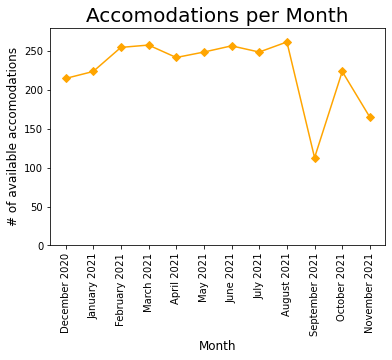

In [9]:
# Plotting the graph for accomodations available per month

x = avail['Month']
y = avail['Count']
plt.plot(x,y,color = 'orange', marker = 'D')  
plt.ylim((0,280))
plt.xticks(rotation = 90)
plt.xlabel('Month', fontsize=12)
plt.ylabel('# of available accomodations', fontsize=12)
plt.title('Accomodations per Month', fontsize=20)
plt.show()


#### Insights from the graph: 
There is a sudden drop in the availability of hotels in September. On closer inspection, it is observed that the avergae is drastically down only during the weekend of 4-5 September which turns out to be the "Braderie de Lille" weekend. 

The drop is thus explained by 2 possibilities: 
- Hypothesis 1. Many of the hotels have been already booked so much in advance
- Hypothesis 2. The hotels have chosen not to make the rooms available yet with hopes of higher prices in future (less likely)

### Availability of Hotels VS Apartments Per Month :

In [10]:
# Count of each room type
df['room_type'].value_counts().head(15)

Apartment                            1380
One-Bedroom Apartment                 227
Studio                                223
Two-Bedroom Apartment                 103
Studio Apartment                      100
Holiday Home                           64
Double Room                            50
Three-Bedroom Apartment                48
Standard Double Room                   33
Apartment with Terrace                 27
Superior Double Room                   22
Superior Apartment                     22
Double Room with Private Bathroom      21
Standard Apartment                     19
Superior Studio                        18
Name: room_type, dtype: int64

In [11]:
# Count of apartments vs hotels
hotel_or_apartment = df.loc[df['room_type'].str.contains('Apartment','Studio')].groupby(['Month'], sort=False, as_index=False)['name'].count()
hotel = df.loc[~df['room_type'].str.contains('Apartment','Studio')].groupby(['Month'], sort=False, as_index=False)['name'].count()
hotel_or_apartment.columns = ['Month','apartment_count']
hotel_or_apartment['hotel_count'] = hotel['name']
hotel_or_apartment

,Month,apartment_count,hotel_count
0,December 2020,151,64
1,January 2021,170,54
2,February 2021,184,71
3,March 2021,188,70
4,April 2021,177,65
5,May 2021,180,69
6,June 2021,186,71
7,July 2021,181,68
8,August 2021,192,70
9,September 2021,70,43


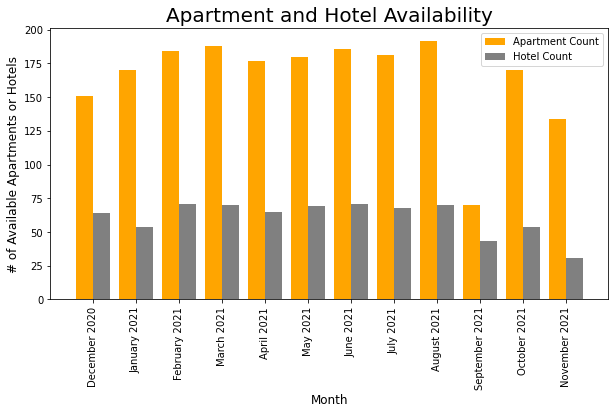

In [12]:
# Plotting availability of apartments vs hotels

x = hotel_or_apartment['Month']
y1 = hotel_or_apartment['apartment_count']
y2 = hotel_or_apartment['hotel_count']

fig, ax = plt.subplots(figsize=(10,5))

xpos = np.arange(len(x))
width = 0.4

ax.bar(xpos - width/2, y1, width, label='Apartment Count', color = "orange")
ax.bar(xpos + width/2, y2, width, label='Hotel Count', color = "grey")

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('# of Available Apartments or Hotels', fontsize=12)
ax.set_title('Apartment and Hotel Availability', fontsize=20)
ax.set_xticks(xpos)
ax.set_xticklabels(x, rotation = 90)
ax.legend()

plt.show()


#### Insights from the graph: 

- The ratio of hotels compared to apartments is very less; In most cases around two-third of the accomodations are apartments or studios.
- The bars for September potentially suggest that apartments are booked faster than hotels, if we stick with hypothesis 1.
- Alternatively, apartment owners want to keep their apartment for themselves during Braderie weekend


### Accomodation Options in Different Areas : 

In [13]:
# Counting number of hotels per location
count_by_location = df.groupby(['location'], sort=False, as_index=False)['name'].count()
count_by_location.columns = ['Location', 'Accomodation Options']
count_by_location

,Location,Accomodation Options
0,Lille Sud,32
1,Lille,190
2,Vieux Lille,874
3,Lille Centre,1197
4,Fives,108
5,Vauban,71
6,Wazemmes,177
7,Bois Blancs,12
8,Moulins,40
9,Faubourg de Béthune,12


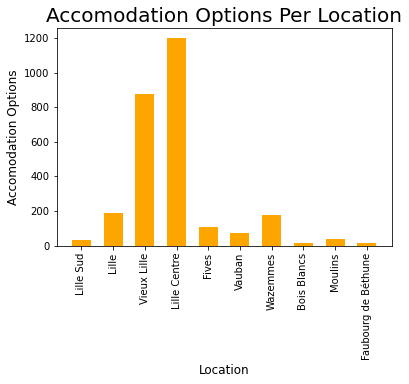

In [14]:
# Plotting bar graph of number of hotels per location

x = count_by_location['Location']
y = count_by_location['Accomodation Options']

fig, ax = plt.subplots()

xpos = np.arange(len(x))
width = 0.6

ax.bar(xpos, y, width, label='Accomodation Options', color = "orange")

ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('Accomodation Options', fontsize=12)
ax.set_title('Accomodation Options Per Location', fontsize=20)
ax.set_xticks(xpos)
ax.set_xticklabels(x, rotation = 90)

plt.show()


#### Insights from the graph: 

- As expected, Lille Centre has maximum number of hotels, followed by Vieux Lille in a duration of 12 months

# 2. Price Analysis

### Calulating Average Price Per Night :

In [15]:
# Converting total_price from object to integer
df['total_price'] = df['total_price'].astype(int)

# Calculating average price per night - total_price/number of nights
df['avg_price_per_night'] = df['total_price']/df['Nbr_of_nights'].astype(int)
df.head(1)

,name,location,total_price,Nbr_of_nights,Nbr_of_persons,room_type,beds,rating,rating_title,number_of_ratings,distance_from_centre,start_date,end_date,breakfast_inclusion,free_cancellation,url,Month,avg_price_per_night
0,Deffrennes,Lille Sud,880,30,2,Budget Double Room,1 double bed,5.9,Review score,441 reviews,2.8 km,Tuesday 1 December 2020,Thursday 31 December 2020,Not Included,FREE cancellation,https://www.booking.com/hotel/fr/deffrennes.en...,December 2020,29.333333


### Price Per Night For Each Month :

In [16]:
# Array of unique months
global_month = df['Month'].unique()
global_month

array(['December 2020', 'January 2021', 'February 2021', 'March 2021',
       'April 2021', 'May 2021', 'June 2021', 'July 2021', 'August 2021',
       'September 2021', 'October 2021', 'November 2021'], dtype=object)

In [17]:
# Creating a dictionary of month-wise average-price per night for each hotel
data = {}
for mon in global_month:
    data[f"{mon}"] = df.loc[df['Month'].str.contains(mon)]['avg_price_per_night']
   
data

{'December 2020': 0       29.333333
 1       41.666667
 2       42.000000
 3       44.366667
 4       44.700000
           ...    
 210    205.833333
 211    211.566667
 212    212.133333
 213    280.800000
 214    660.000000
 Name: avg_price_per_night, Length: 215, dtype: float64,
 'January 2021': 215     30.500000
 216     39.800000
 217     42.300000
 218     45.000000
 219     45.000000
           ...    
 434    278.566667
 435    283.700000
 436    312.000000
 437    327.433333
 438    414.933333
 Name: avg_price_per_night, Length: 224, dtype: float64,
 'February 2021': 439     30.000000
 440     39.814815
 441     42.296296
 442     45.000000
 443     48.740741
           ...    
 689    377.629630
 690    377.666667
 691    386.111111
 692    501.407407
 693    613.074074
 Name: avg_price_per_night, Length: 255, dtype: float64,
 'March 2021': 694     30.000000
 695     39.800000
 696     42.300000
 697     45.000000
 698     48.766667
           ...    
 947    274.366667
 948 

In [18]:
# Creating a list of above dictionary 
final_data = [data[mon] for mon in global_month]

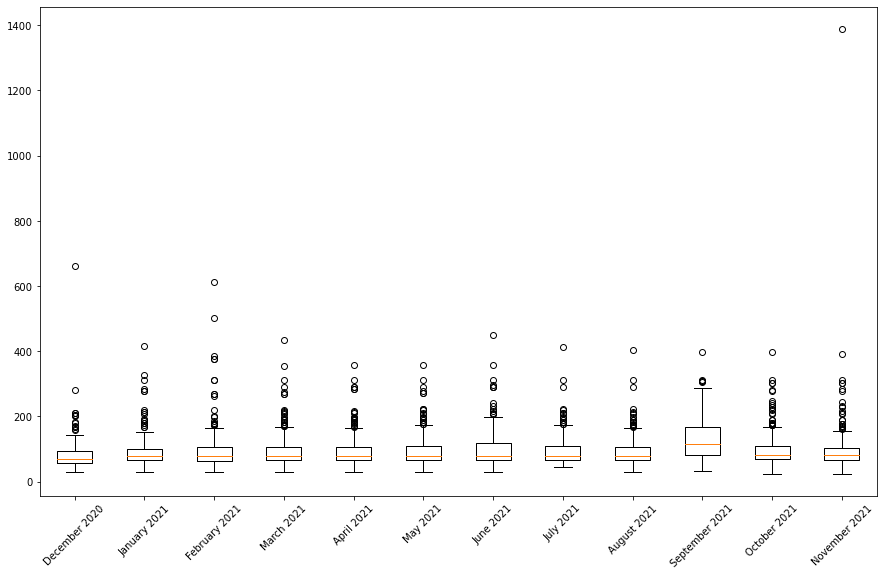

In [19]:
# Create the boxplot
fig, ax = plt.subplots(figsize=(15,9))
x = global_month

ax.set_xticklabels(x, rotation = 45)
figout = ax.boxplot(final_data)

#### Insights from the graph: 

- There is an extraordinary outlier in November 2021 which needs to be removed for better analysis.


### Price Per Night For Each Month (removing the outlier) :

In [20]:
# Dropping the last row which represents the outlier in November 2021 in the above plot to get a more accurate graph
df = df.drop(df.index[-1])

In [21]:
# Updating the dictionary for November 2021 after removing the outlier

data['November 2021'] = df.loc[df['Month'].str.contains('November 2021')]['avg_price_per_night']
final_data = [data[mon] for mon in global_month]

Text(0.5, 1.0, 'Avg. Price per Night by Month')

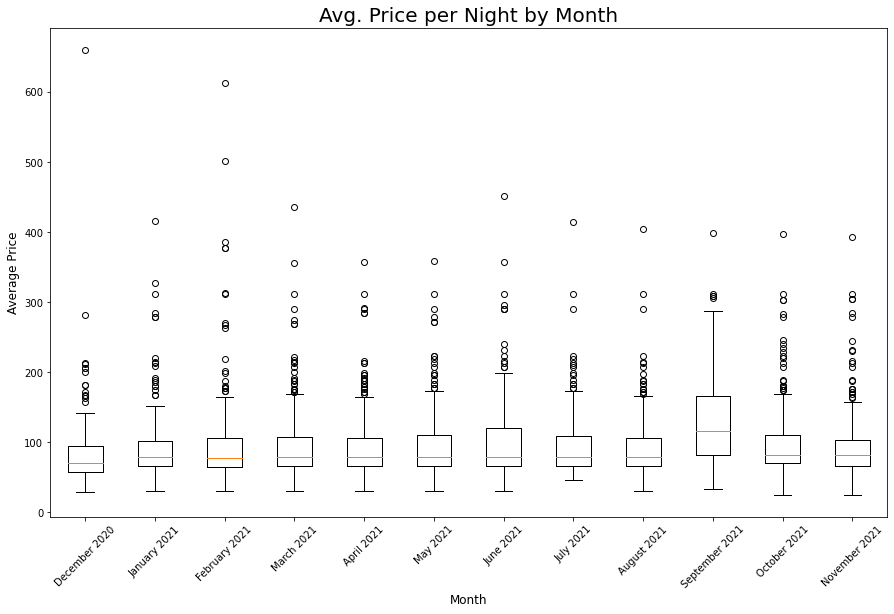

In [22]:
# Create the boxplot

fig, ax = plt.subplots(figsize=(15,9))
x = global_month

ax.set_xticklabels(x, rotation = 45)
figout = ax.boxplot(final_data)

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)
ax.set_title('Avg. Price per Night by Month', fontsize=20)


#### Insights from the graph: 

- Overall, for all the months except September, it is observed that lower 50% of the hotels have similar or standard price range throughout the year
- The higher end / top half of the hotels have varied prices across all months
- September (being the festival month) and June (being the summer month) have a larger third quartile possibly because of higher earning scope suring those months

### Price Per Location : 

In [23]:
# creating a variable global_location with all locations in Lille
global_location = df['location'].unique()

In [24]:
# Creating dictionary of location and corresponding average prices
data = {}
for loc in global_location:
    data[f"{loc}"] = df.loc[df['location'].str.contains(loc)]['avg_price_per_night']

In [25]:
# Creating a list of above dictionary 
final_data = [data[loc] for loc in global_location]

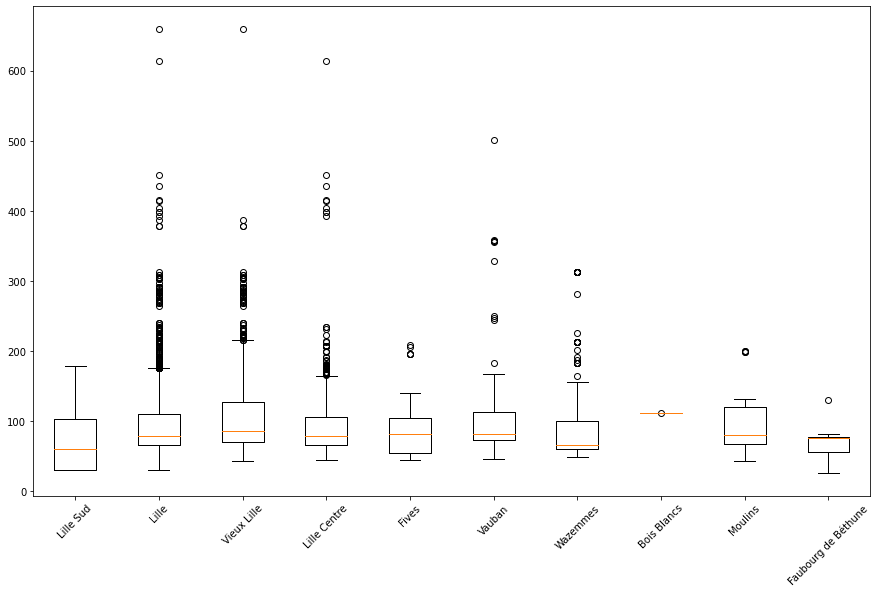

In [26]:
# Create the boxplot
fig, ax = plt.subplots(figsize=(15,9))
x = global_location

ax.set_xticklabels(x, rotation = 45)
figout = ax.boxplot(final_data)

#### Insights from the graph: 

- The plot for Bois Blancs is interesting. It apprears that there is only 1 hotel in Bois Blancs. This also posisbly explains why the median price of that location is higher than all other quartiers

- Top 50% of the hotels in Vieux Lille is higher priced compared to top 50% in other locations

- Faubourg de Béthune is a low-budget area

### Average Price Per Location :

In [27]:
# Calculating avg. price per night for each quartier
avg_price_by_location = df.groupby(['location'], sort=False, as_index=False)['avg_price_per_night'].mean().round(2)
avg_price_by_location.columns = ['Location','Avg. Price per Night']
avg_price_by_location

,Location,Avg. Price per Night
0,Lille Sud,70.83
1,Lille,77.06
2,Vieux Lille,107.59
3,Lille Centre,92.72
4,Fives,85.91
5,Vauban,116.91
6,Wazemmes,100.62
7,Bois Blancs,110.93
8,Moulins,94.06
9,Faubourg de Béthune,68.90


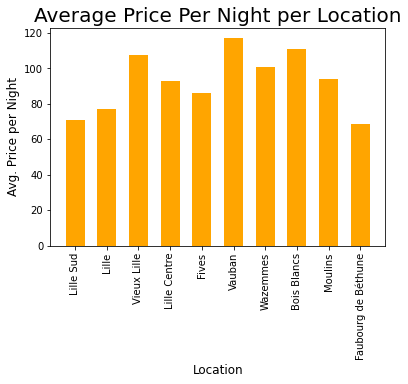

In [28]:
# Plotting average price per area in Lille
x = avg_price_by_location['Location']
y = avg_price_by_location['Avg. Price per Night']

fig, ax = plt.subplots()

xpos = np.arange(len(x))
width = 0.6

ax.bar(xpos, y, width, label='Avg. Price per Night', color = "orange")

ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('Avg. Price per Night', fontsize=12)
ax.set_title('Average Price Per Night per Location', fontsize=20)
ax.set_xticks(xpos)
ax.set_xticklabels(x, rotation = 90)

plt.show()


In [29]:
# installing necessary packages for map visualization
# pip install opencage
# pip install plotly==4.12.0

In [30]:
# importing opencage geocoder
from opencage.geocoder import OpenCageGeocode

In [31]:
# Code to fetch longitude and latitudes of areas in Lille where these hotels are located

key = '66aa6dea13c740b5aba9c9ed893e98dd'
geocoder = OpenCageGeocode(key)
query = ['Lille Centre, Hauts-de-France', 'Lille Sud, Hauts-de-France', 'Fives, Hauts-de-France', 'Wazemmes, Hauts-de-France', 'Bois Blancs, Hauts-de-France', 'Vieux Lille, Hauts-de-France', 'Vauban, Hauts-de-France', 'Moulins, Hauts-de-France','Faubourg de Béthune, Hauts-de-France']
lat = {}
lng = {}
for q in query:
    results = geocoder.geocode(q)
    lat[q] = results[0]['geometry']['lat']
    lng[q] = results[0]['geometry']['lng']
lat, lng

#Reference: #https://amaral.northwestern.edu/blog/getting-long-lat-list-cities

({'Lille Centre, Hauts-de-France': 50.6327393,
  'Lille Sud, Hauts-de-France': 50.6087884,
  'Fives, Hauts-de-France': 50.6285672,
  'Wazemmes, Hauts-de-France': 50.6246036,
  'Bois Blancs, Hauts-de-France': 50.6345058,
  'Vieux Lille, Hauts-de-France': 50.6435745,
  'Vauban, Hauts-de-France': 49.902754,
  'Moulins, Hauts-de-France': 49.4217,
  'Faubourg de Béthune, Hauts-de-France': 50.6179011},
 {'Lille Centre, Hauts-de-France': 3.0673255,
  'Lille Sud, Hauts-de-France': 3.0446185,
  'Fives, Hauts-de-France': 3.0903533,
  'Wazemmes, Hauts-de-France': 3.0505748,
  'Bois Blancs, Hauts-de-France': 3.0304363,
  'Vieux Lille, Hauts-de-France': 3.0623372,
  'Vauban, Hauts-de-France': 2.3032089,
  'Moulins, Hauts-de-France': 3.6847,
  'Faubourg de Béthune, Hauts-de-France': 3.0366424})

In [56]:
# Plotting a mapbox from Plotly package
lille_quartiers = pd.read_csv("Lille Areas.csv")

import plotly.express as px

fig = px.scatter_mapbox(lille_quartiers, lat="lat", lon="lon", hover_name="Area", hover_data=["Avg_Price", "Nbr_Hotels"],
                        color_discrete_sequence=["red"], zoom=12, height=450, width=500, size_max=100, title="Average Prices per Area")
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#Reference: 
#https://plotly.com/python/scattermapbox/
#https://plotly.com/python/mapbox-layers/

#### Insights from the graph: 

- As the previous boxplot suggests, Faubourg de Béthune has lowest hotel prices and Bois Blancs is expensive compared to most others because of a hotel's monopoly in the area

- However, while the boxplot gave an impression that possibly Lille Centre and Vieux Lille would be more expensive, it turns out that average price for Vauban is higher than all other areas


### Average Price Per Quartier Per Month :

In [33]:
#Avg price per area per month

df_location = df.groupby(['Month','location'],sort=False, as_index = False)['avg_price_per_night'].mean()
df_location

,Month,location,avg_price_per_night
0,December 2020,Lille Sud,41.400000
1,December 2020,Lille,67.548889
2,December 2020,Vieux Lille,97.144292
3,December 2020,Lille Centre,76.751852
4,December 2020,Fives,83.885714
...,...,...,...
113,November 2021,Wazemmes,106.279693
114,November 2021,Lille Centre,98.734280
115,November 2021,Vauban,127.456897
116,November 2021,Moulins,96.396552


In [34]:
selected_location = ['Lille Centre', 'Vieux Lille', 'Vauban', 'Moulins', 'Faubourg de Béthune']

In [35]:
data = {}
for locat in selected_location:
    data[f"{locat}"] = df_location.loc[df_location['location'] == locat][['Month', 'avg_price_per_night']]

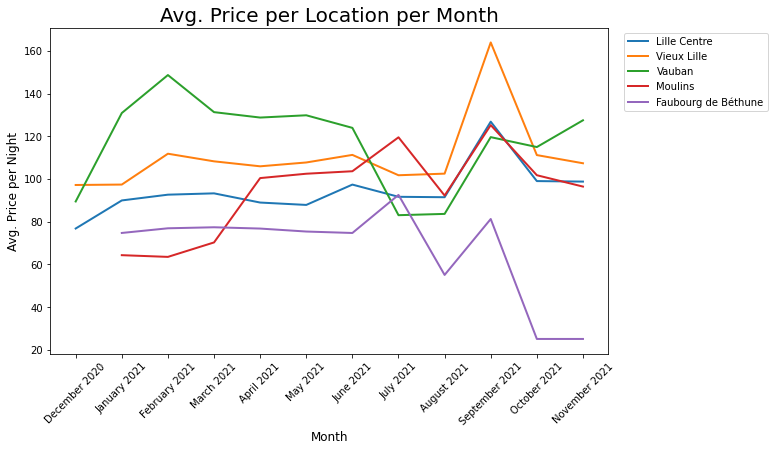

In [36]:
fig, ax = plt.subplots(figsize=(10,6))

for locat in selected_location:
    ax.plot(data[locat]['Month'],data[locat]['avg_price_per_night'], linewidth=2)

ax.set_xticklabels(global_month, rotation = 45)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Avg. Price per Night', fontsize=12)
ax.set_title('Avg. Price per Location per Month', fontsize=20)
ax.legend(selected_location, bbox_to_anchor=(1.02, 1), loc='upper left')

#### Insights from the graph: 

- This is super interesting. The average prices in Vauban are higher than others during January to May and then a sudden drop during the summer months June-August. Then again we see the prices increasing from September. The most obvious explanation would be that Vauban is a student quartier with most universities and colleges. Many students come from outside to Lille to study and go bak home / on vacation during the summer break so the prices go down. While January-February and  September sees peak of the season as many students would stay in hotels etc. until they find a long-term accomodation for themselves. 

- Vieux Lille and Lille Centre have somewhat similar trend in prices and are undoubtedly favourite tourist places in Lille for staying.The peak in September is explained earlier - Braderie de Lille that attracts 3 million visitors every year. 

- The constant low prices of Faubourg de Béthune are explained by its reputation as among the poorest and unsafe areas.

# 3. Ratings & Reviews Analysis 

### Number of Hotels with Specific Rating Titles in Different Locations :

In [37]:
#Rating titles by location
new_df = df.dropna(subset=['rating_title'])

#Counting number of hotels per location by rating titles
location_rating = new_df.groupby(['location'])['rating_title'].value_counts(ascending = False)

In [38]:
# Number of hotels per location (removing nulls for rating title)
count_by_location = new_df.groupby(['location'])['name'].count()
count_by_location.head(2)

location
Bois Blancs            12
Faubourg de Béthune    11
Name: name, dtype: int64

In [39]:
# Calculating % or proportion of each rating title in all locations
(location_rating/count_by_location)*100

location             rating_title
Bois Blancs          Fabulous        100.000000
Faubourg de Béthune  Good             81.818182
                     Review score     18.181818
Fives                Fabulous         37.500000
                     Very good        20.833333
                     Good             18.750000
                     Exceptional      12.500000
                     Review score      8.333333
                     Superb            2.083333
Lille                Very good        48.305085
                     Fabulous         19.491525
                     Exceptional      15.254237
                     Review score      9.322034
                     Superb            6.779661
                     Good              0.847458
Lille Centre         Very good        41.845140
                     Fabulous         17.627677
                     Superb           13.838550
                     Good             13.509061
                     Review score      8.731466
      

### Average Ratings Per Location : 

In [40]:
# Computing average rating for each area
location_rating = new_df.groupby(['location'], sort = False, as_index=False)['rating'].mean()
location_rating.columns = ['Location', 'Avg. Rating']
location_rating

,Location,Avg. Rating
0,Lille Sud,7.028125
1,Lille,8.418644
2,Vieux Lille,8.430997
3,Lille Centre,8.246952
4,Vauban,7.491071
5,Fives,8.327083
6,Wazemmes,8.440000
7,Bois Blancs,8.700000
8,Moulins,8.030000
9,Faubourg de Béthune,6.318182


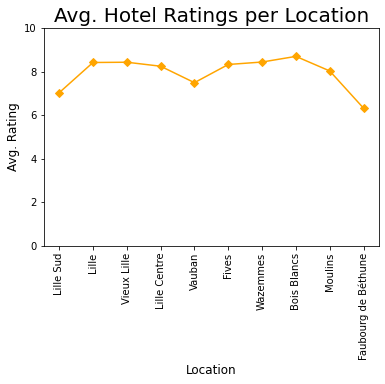

In [41]:
# Plotting line graph for averagre rating per location
x = location_rating['Location']
y = location_rating['Avg. Rating']
plt.plot(x,y,color = 'orange', marker = 'D')  
plt.ylim((0,10))
plt.xticks(rotation = 90)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Avg. Rating', fontsize=12)
plt.title('Avg. Hotel Ratings per Location', fontsize=20)
plt.show()

#### Insights from the graph: 

- The average rating of Faubourg de Bethune is lowest, most likely because of the other factors related to the area itself. Also as there are not any high end hotels (indicated by the lowest average pricing), this can be quite obvious.

### Relation of Avg. Price & Ratings :

In [42]:
df_ratings = df.groupby(['location','rating_title'])['avg_price_per_night'].mean()
df_ratings

location             rating_title
Bois Blancs          Fabulous        110.931950
Faubourg de Béthune  Good             71.863488
                     Review score     25.000000
Fives                Exceptional     199.000000
                     Fabulous         81.910316
                     Good             50.487867
                     Review score     57.366667
                     Superb           69.000000
                     Very good       118.032822
Lille                Exceptional      71.103271
                     Fabulous         86.928791
                     Good             68.400000
                     Review score     52.657483
                     Superb          124.231753
                     Very good        72.571040
Lille Centre         Exceptional     105.672806
                     Fabulous        100.916507
                     Good            124.184947
                     Review score     79.828222
                     Superb          122.651963
      

### Number of Hotels Falling Under Which Rating Category :

In [43]:
# Rating title with corresponding count of each 

title_count = df.groupby(['rating_title'], sort=False, as_index=False)['name'].count()
title_count.columns = ['Rating', 'Count of Hotels']
title_count

,Rating,Count of Hotels
0,Review score,115
1,Very good,488
2,Superb,239
3,Good,209
4,Fabulous,233
5,Exceptional,61


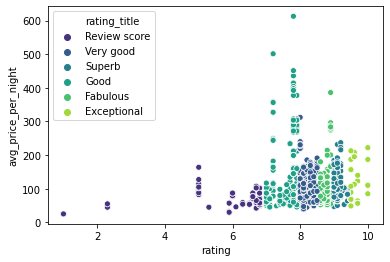

In [53]:
# Plotting a Seaborn scatterplot with rating per hotel on a scale of 10 on X axis and average price on the y-axis
scatter_plot =sns.scatterplot(x="rating", y="avg_price_per_night",
              hue="rating_title", palette='viridis', data=df);

In [45]:
#Checking for outliers of good rating category
good_outliers = df.loc[df['rating_title'] == "Good"].sort_values('avg_price_per_night', ascending = False)
good_outliers.head(2)

,name,location,total_price,Nbr_of_nights,Nbr_of_persons,room_type,beds,rating,rating_title,number_of_ratings,distance_from_centre,start_date,end_date,breakfast_inclusion,free_cancellation,url,Month,avg_price_per_night
693,NOCNOC - La Villa Cachee,Lille Centre,16553,27,2,Villa,"14 beds(7 singles, 5 doubles, 2 sofa beds)",7.8,Good,5 reviews,900 m,Monday 1 February 2021,Sunday 28 February 2021,Not Included,No Free Cancellation,https://www.booking.com/hotel/fr/la-villa-cach...,February 2021,613.074074
692,NOCNOC - Le grand National,Vauban,13538,27,2,Apartment,"11 beds(4 singles, 7 doubles)",7.2,Good,18 reviews,1.2 km,Monday 1 February 2021,Sunday 28 February 2021,Not Included,No Free Cancellation,https://www.booking.com/hotel/fr/le-grand-nati...,February 2021,501.407407


#### Insights from the graph: 

- As the ratings increase there's also a corresponding change in average price per night
- The "Very Good" hotels are super bunched up, with the highest count of hotels being in Very Good category and their prices also being super competitive.
- Most of the high price outliers in the "Good" range are from 2-3 properties in Vieux Lille consistently priced higher than properties in the "Good" range in other locations
- The high price is because of 'NOCNOC - Grand Place - La Perle and Belle Vue'. However, the reason is that these are HUGE houses with 8-9 beds, hence high prices.


# Correlation For Additional Services

### Correlation Between Breakfast Inclusion, Free Cancellation, Price, Distance, Ratings : 

In [46]:
# Add new columns named 'breakfast' and 'cancellation' to convert strings into binary integers for computational purpose
df['breakfast'] = [0 if x =='Not Included' else 1 for x in df['breakfast_inclusion']]
df['cancellation'] = [1 if x =='FREE cancellation' else 0 for x in df['free_cancellation']] 

In [47]:
# Converting values in kms to mtrs to have the same measure of distance from cetre
df['distance'] = [int(float(d.split()[0])*1000) if 'km' in d else int(d.split()[0]) for d in df['distance_from_centre']]

In [48]:
# dropping the null values
new_df1 = df.dropna()

In [49]:
# Converting number of user reviews to integer
df['reviews'] = new_df1['number_of_ratings'].str.split().str[0].str.replace(',', '').astype(int)

In [50]:
# Converting total_price into integer
df['total_price'] = df['total_price'].astype(int)

In [51]:
# Creating new dataframe with all the data cleaning changes made above
corr_df = df.loc[:,['rating', 'reviews', 'distance', 'total_price','breakfast','cancellation']]
corr_df

,rating,reviews,distance,total_price,breakfast,cancellation
0,5.9,441.0,2800,880,0,1
1,8.1,52.0,3700,1250,0,1
2,NaN,NaN,550,1260,0,1
3,NaN,NaN,700,1331,0,1
4,NaN,NaN,1300,1341,0,1
...,...,...,...,...,...,...
2707,8.9,6.0,100,8229,0,0
2708,7.9,10.0,100,8819,0,0
2709,7.8,8.0,100,8819,0,0
2710,NaN,NaN,1000,9048,0,0


Text(0.5, 1.0, 'Correlation matrix')

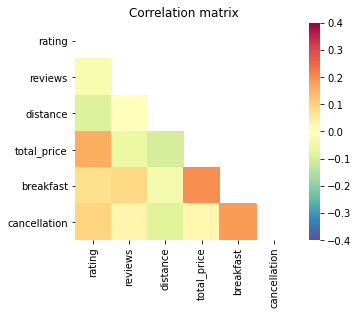

In [54]:
# Plotting a heatmap correlation matrix between several elements
correlation_matrix = corr_df.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

#Reference: https://raphaelvallat.com/correlation.html

#### Insights from the graph: 

**Note:**
- Colors more towards red/orange - Higher positive correlation
- Colors more towards blue/green - Higher negative correlation

**Positive correlation** -

- There is a direct correlation between inclusion of breakfast in the booking and the total price per night. Booking.com should do an analysis from historic data to see if its customers opt more for hotels with breakfast included. If yes, a strategy around this can be advantageous to the company. Even if the customers are paying little more for that, it isn't explicitly known.
- Another interesting finding from this matrix is that there is a good correlation between 'breakfast' and 'cancellation', meaning that hotels that offer one of these services also tend to offer the other one
- As we can expect, there is a correlation between price and ratings. Higher the ratings, higher the cost per night. 
- There is a slight positive correlation between free cancellation service and higher ratings. 
- Breakfast inclusion and the number of reviews for the hotel has a correclation of around 0.1 but further investigation is required from historic data to confirm this. 

**Negative correlation** -

- Interestingly, as the hotels are closer to the city centre (distance), the ratings on an average are higher
- As we can anticipate, hotels closer to the city centre are priced higher
- The light green box at the intersection of distance and cancellation suggest that closer the hotel is to the centre, more options for free cancellation are available. Now, this could be because these hotels would have more assurance of being occupied even later while far away hotels cannot expect the same. 

# Thank You